In [318]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [319]:
#loading the data
df = pd.read_csv('NY-House-Dataset.csv')

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [320]:
#checking the shape of the data
df.shape

(4801, 17)

In [321]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

#### Data Cleaning

In [322]:
#Drop unneccessary columns
#The only columns that will be retained are :BROKERTITLE, TYPE, PRICE, BEDS, BATH, PROPERTYSQFT, LOCALITY

df = df[['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LOCALITY']]
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,New York
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,New York
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,New York
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,New York
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,New York


In [323]:
#checking on locality of the houses
print(df['LOCALITY'].unique())

['New York' 'New York County' 'The Bronx' 'Kings County' 'Bronx County'
 'Queens County' 'Richmond County' 'United States' 'Brooklyn' 'Queens'
 'Flatbush']


In [324]:
#checking on the count of the localities
df['LOCALITY'].value_counts()

LOCALITY
New York           2505
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Brooklyn              6
Queens                6
The Bronx             5
Flatbush              1
Name: count, dtype: int64

In [325]:
# We need to clean up the locality column, merge some localities and remove the ones that are not necessary

#Delete the rows which have United States and Flatbush as the locality
df = df[df.LOCALITY != 'United States']
df = df[df.LOCALITY != 'Flatbush']

#Under locality column merge the rows which has New York and New York County as the locality to form New York County
df['LOCALITY'] = df['LOCALITY'].replace(['New York', 'New York County'], 'New York County')

#merge the rows which has Brooklyn and Kings County as the locality to form Kings County
df['LOCALITY'] = df['LOCALITY'].replace(['Brooklyn', 'Kings County'], 'Kings County')

#merge the rows which has Queens and Queens County as the locality to form Queens County
df['LOCALITY'] = df['LOCALITY'].replace(['Queens', 'Queens County'], 'Queens County')

#merge the rows which has The Bronx and Bronx County as the locality to form Bronx County
df['LOCALITY'] = df['LOCALITY'].replace(['The Bronx', 'Bronx County'], 'Bronx County')

#checking the data
print(df['LOCALITY'].value_counts())

LOCALITY
New York County    3484
Queens County       563
Kings County        470
Bronx County        187
Richmond County      59
Name: count, dtype: int64


In [326]:
#shape of the data
df.shape

(4763, 7)

In [327]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4763 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BROKERTITLE   4763 non-null   object 
 1   TYPE          4763 non-null   object 
 2   PRICE         4763 non-null   int64  
 3   BEDS          4763 non-null   int64  
 4   BATH          4763 non-null   float64
 5   PROPERTYSQFT  4763 non-null   float64
 6   LOCALITY      4763 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 297.7+ KB


In [328]:
#inspect the type column
print(df['TYPE'].value_counts())

#unique values in the type column
print(df['TYPE'].unique())

#how many unique values in the type column
print(df['TYPE'].nunique())

TYPE
Co-op for sale                1442
House for sale                1000
Condo for sale                 888
Multi-family home for sale     716
Townhouse for sale             299
Pending                        242
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64
['Condo for sale' 'House for sale' 'Townhouse for sale' 'Co-op for sale'
 'Multi-family home for sale' 'For sale' 'Contingent' 'Land for sale'
 'Foreclosure' 'Pending' 'Coming Soon' 'Mobile house for sale'
 'Condop for sale']
13


In [329]:
#merge Condo for sale and Condop for sale to form Condo for sale
df['TYPE'] = df['TYPE'].replace(['Condo for sale', 'Condop for sale'], 'Condo for sale')

print(df['TYPE'].value_counts())




TYPE
Co-op for sale                1442
House for sale                1000
Condo for sale                 893
Multi-family home for sale     716
Townhouse for sale             299
Pending                        242
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64


In [330]:
#inspect the beds column
print(df['BEDS'].value_counts())

#unique values in the beds column
print(df['BEDS'].unique())

#how many unique values in the beds column
print(df['BEDS'].nunique())

BEDS
3     1443
2      990
1      815
4      564
5      357
6      269
7      103
8       84
9       39
10      21
12      21
11      20
14       7
15       5
13       5
16       4
20       3
24       3
32       2
35       1
50       1
36       1
42       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64
[ 2  7  4  3  5  8  1  6 10 11  9 12 15 14 16 20 35 24 50 13 32 36 42 40
 30 19 18]
27


In [331]:
#percentage of houses with 10 beds and above
print((df[df['BEDS'] <= 10].shape[0]/df.shape[0])*100)

98.36237665336972


In [332]:
#drop the rows with 10 beds and above
df = df[df['BEDS'] <= 10]



In [333]:
#inspect the bath column
print(df['BATH'].value_counts())

#unique values in the bath column
print(df['BATH'].unique())

#how many unique values in the bath column
print(df['BATH'].nunique())

BATH
2.000000     1664
1.000000     1509
4.000000      474
3.000000      458
2.373861      296
6.000000      115
5.000000       97
8.000000       32
7.000000       17
10.000000      12
9.000000        3
0.000000        3
16.000000       1
32.000000       1
13.000000       1
11.000000       1
17.000000       1
Name: count, dtype: int64
[ 2.         10.          1.          2.37386086 16.          3.
  4.          6.          8.          5.          9.          7.
 32.         13.         11.          0.         17.        ]
17


In [334]:
#Percentage of houses with 10 baths and below
print((df[df['BATH'] <= 10].shape[0]/df.shape[0])*100)  

99.89327641408752


In [335]:
#drop the rows with 10 baths and above
df = df[df['BATH'] <= 10]

In [336]:
#inspect the bath column
print(df['BATH'].value_counts())

#Drop the rows with 0 baths
df = df[df['BATH'] != 0]

#print value counts of the bath column
print(df['BATH'].value_counts())




BATH
2.000000     1664
1.000000     1509
4.000000      474
3.000000      458
2.373861      296
6.000000      115
5.000000       97
8.000000       32
7.000000       17
10.000000      12
9.000000        3
0.000000        3
Name: count, dtype: int64
BATH
2.000000     1664
1.000000     1509
4.000000      474
3.000000      458
2.373861      296
6.000000      115
5.000000       97
8.000000       32
7.000000       17
10.000000      12
9.000000        3
Name: count, dtype: int64


In [337]:
#inspect the price column
# The house with the highest price
print(df['PRICE'].max())

#shape of the price series
df['PRICE'].shape


#drop the house with the highest price
df = df[df['PRICE'] != 2147483647]

#shape of the price series
df['PRICE'].shape




2147483647


(4676,)

In [338]:
#checking the missing values

missing_values = df.isnull().sum()

print(missing_values)


BROKERTITLE     0
TYPE            0
PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
LOCALITY        0
dtype: int64


In [339]:
#descriptive statistics
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4.676000e+03,4676.000000,4676.000000,4676.000000
mean,1.873226e+06,3.139649,2.245651,2103.708360
std,4.872900e+06,1.768277,1.372862,2185.930253
min,2.494000e+03,1.000000,1.000000,230.000000
25%,4.950000e+05,2.000000,1.000000,1200.000000
50%,7.999990e+05,3.000000,2.000000,2184.207862
75%,1.450000e+06,4.000000,3.000000,2184.207862
max,1.950000e+08,10.000000,10.000000,65535.000000


In [340]:
#checking for duplicates and removing them

df.duplicated().sum()

df.drop_duplicates(inplace=True)

#checking the shape of the data
df.shape





(4437, 7)

In [341]:
# price analysis
df['PRICE'].describe()


count    4.437000e+03
mean     1.880854e+06
std      4.934854e+06
min      2.494000e+03
25%      4.950000e+05
50%      7.999990e+05
75%      1.459000e+06
max      1.950000e+08
Name: PRICE, dtype: float64

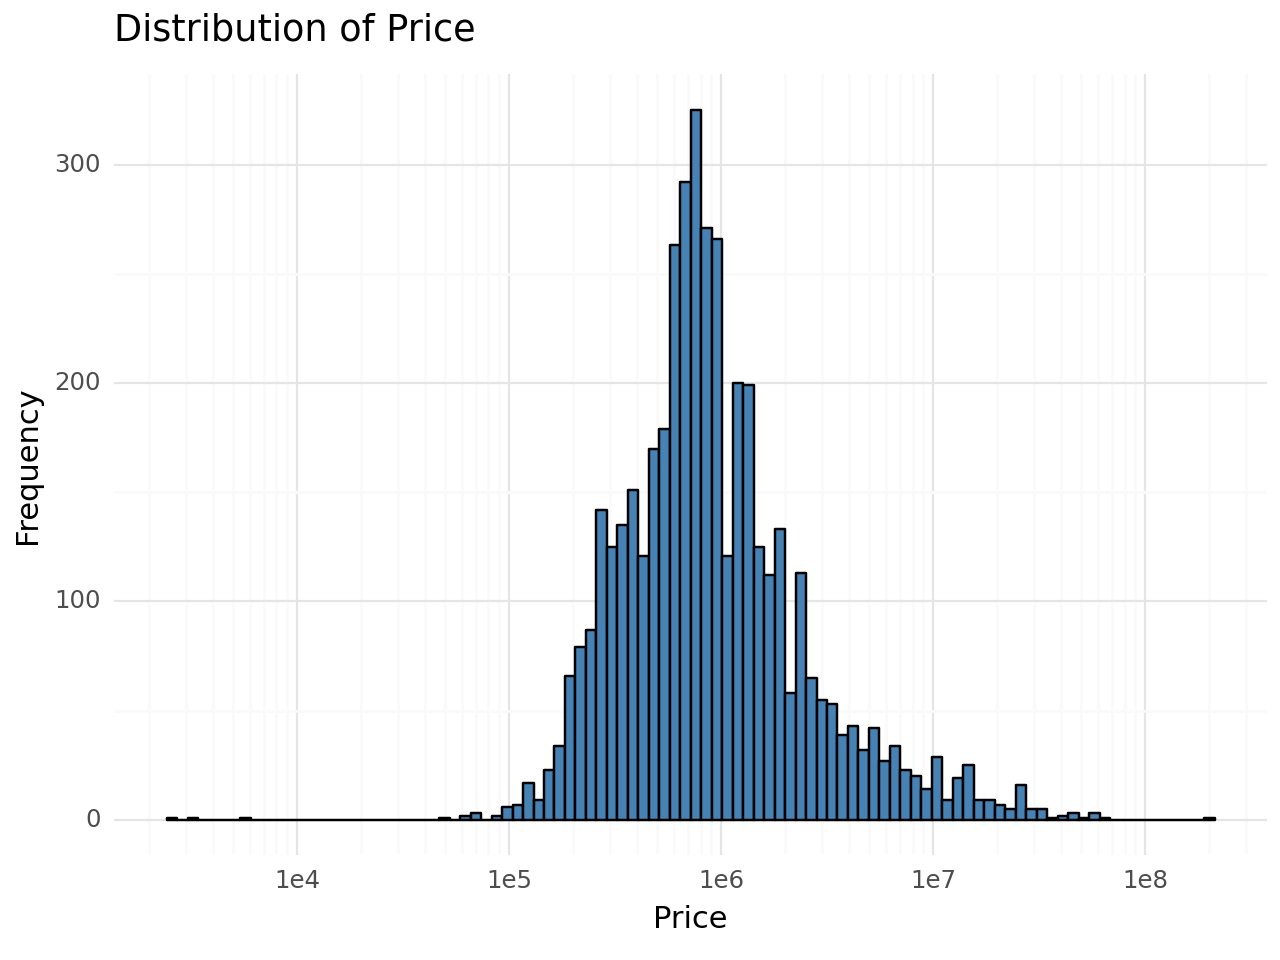

<Figure Size: (640 x 480)>

In [343]:
import plotnine as p9
from plotnine import ggplot, aes, geom_histogram, labs, scale_x_log10, theme_minimal
(ggplot(df) +
 geom_histogram(aes(x='PRICE'), bins=100, fill='steelblue', color='black') +
 labs(title='Distribution of Price', x='Price', y='Frequency') +
 scale_x_log10() +
 theme_minimal()
)


#Explain the analysis
#The distribution of price is right skewed. This means that most of the houses are in the lower price range.
#There are very few houses in the higher price range.
#The distribution of price is not normal.


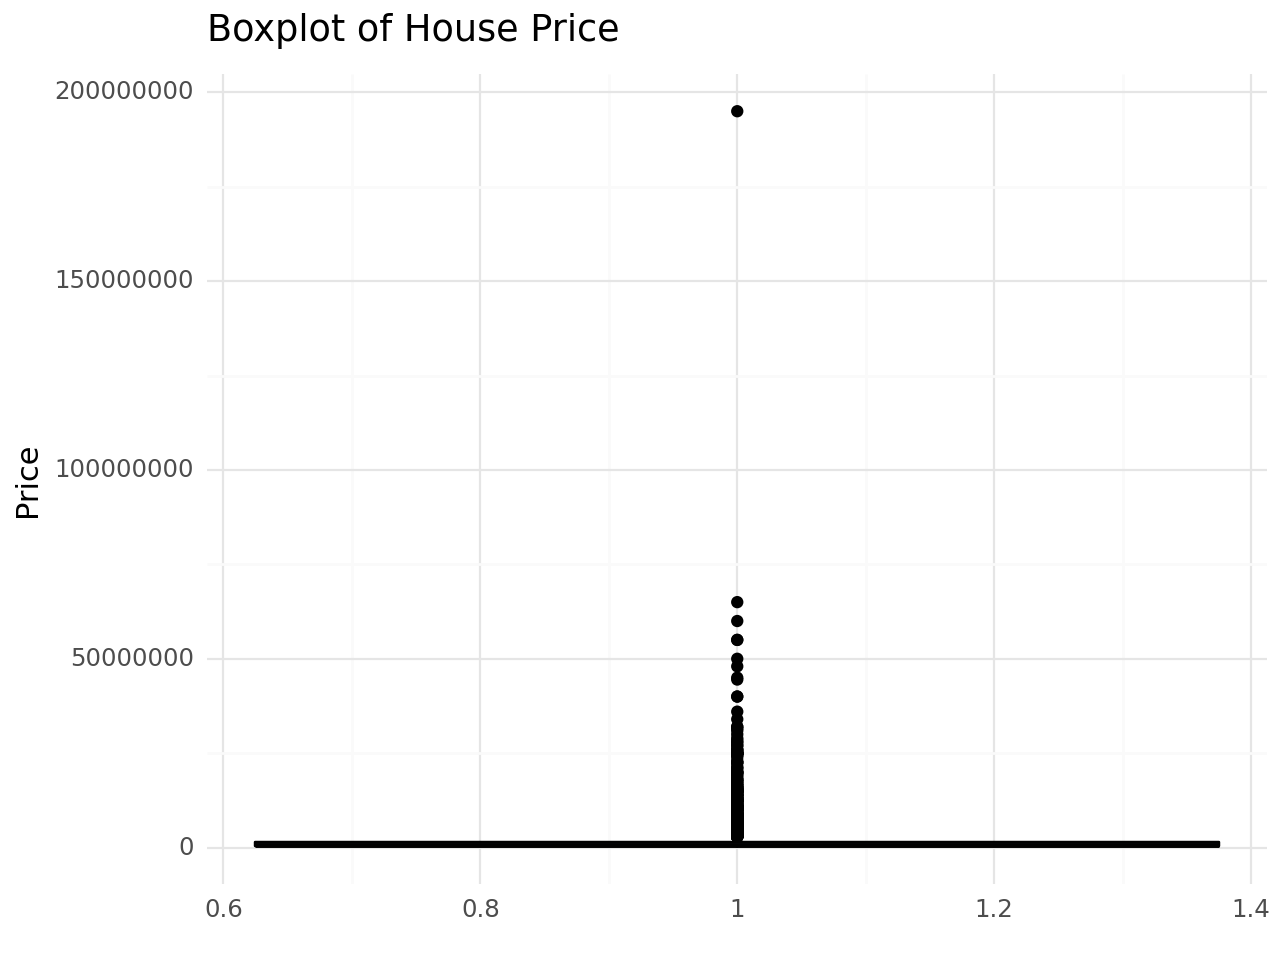

<Figure Size: (640 x 480)>

In [344]:
from plotnine import ggplot, aes, geom_boxplot, theme_minimal
#from plotnine.scales import scale_x_discrete, scale_y_log10  # import the scale_y_log10 function

# importing the required libraries
# creating the boxplot
boxplot = (ggplot(df) +
           aes(x='1', y='PRICE') +
           geom_boxplot(fill='steelblue', color='black') +
           theme_minimal() +
           labs(title='Boxplot of House Price', x='', y='Price') 
          )

# displaying the boxplot
boxplot


In [345]:
import plotly.express as px

fig = px.box(df, y='PRICE', title='Boxplot of House Price')
fig.update_layout(xaxis_title='Price', yaxis_title='House Price')
fig.show()


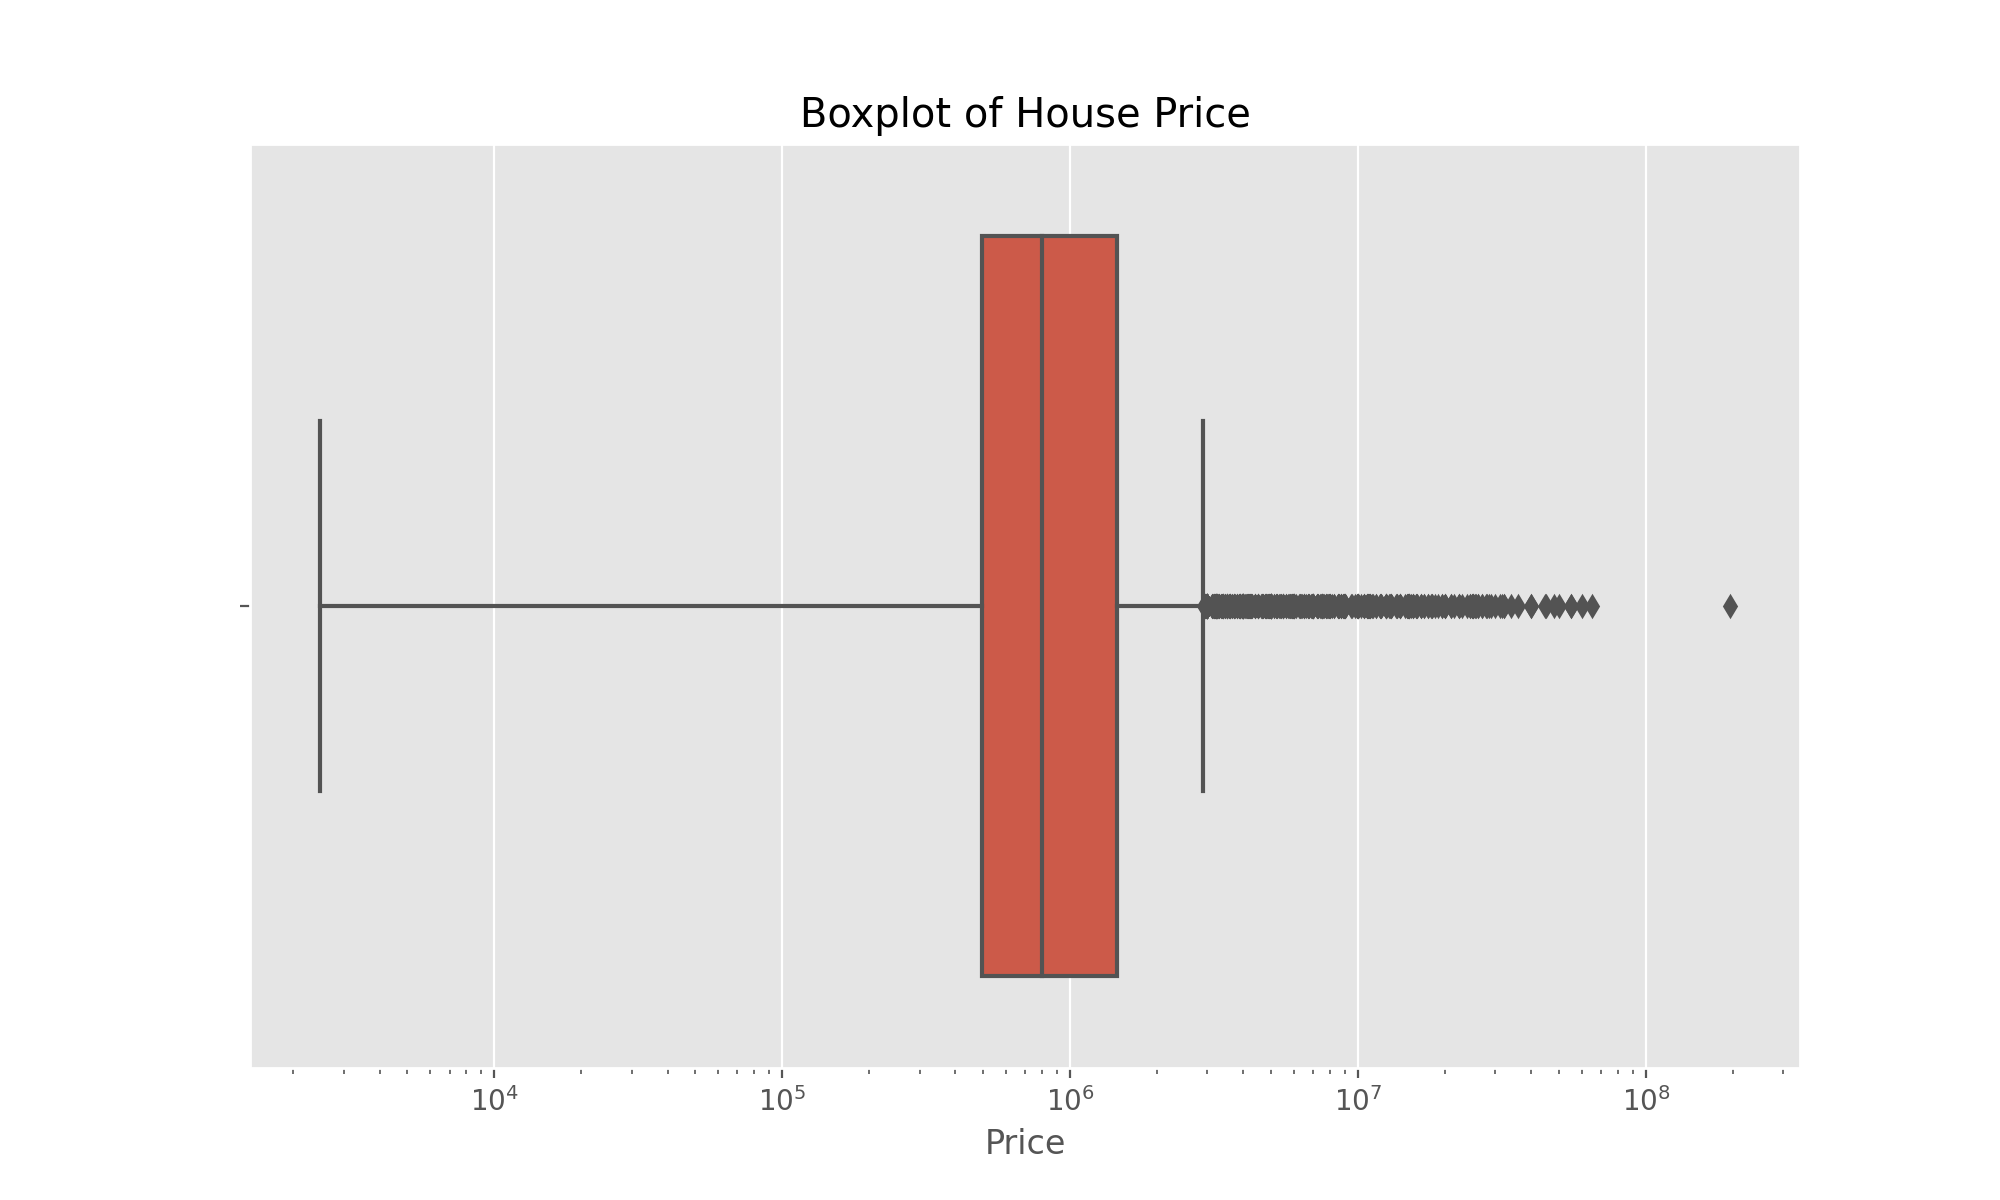

In [346]:
# indenfiying the outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['PRICE'])
plt.title("Boxplot of House Price")
plt.xlabel("Price")
plt.xscale('log')  # using log scale due to wide range of prices
plt.xlabel("Price")
plt.show()

#explaining the the boxplot
#The boxplot shows that there are many outliers in the price variable.
#The outliers are the houses with very high prices.
#The median price is around 400,000 dollars.
#The boxplot also shows that there are some houses with very low prices.




In [347]:
#removing the outliers
#removing the top 1% of the data
q = df['PRICE'].quantile(0.99)
df = df[df['PRICE']<q]
df.shape

(4391, 7)

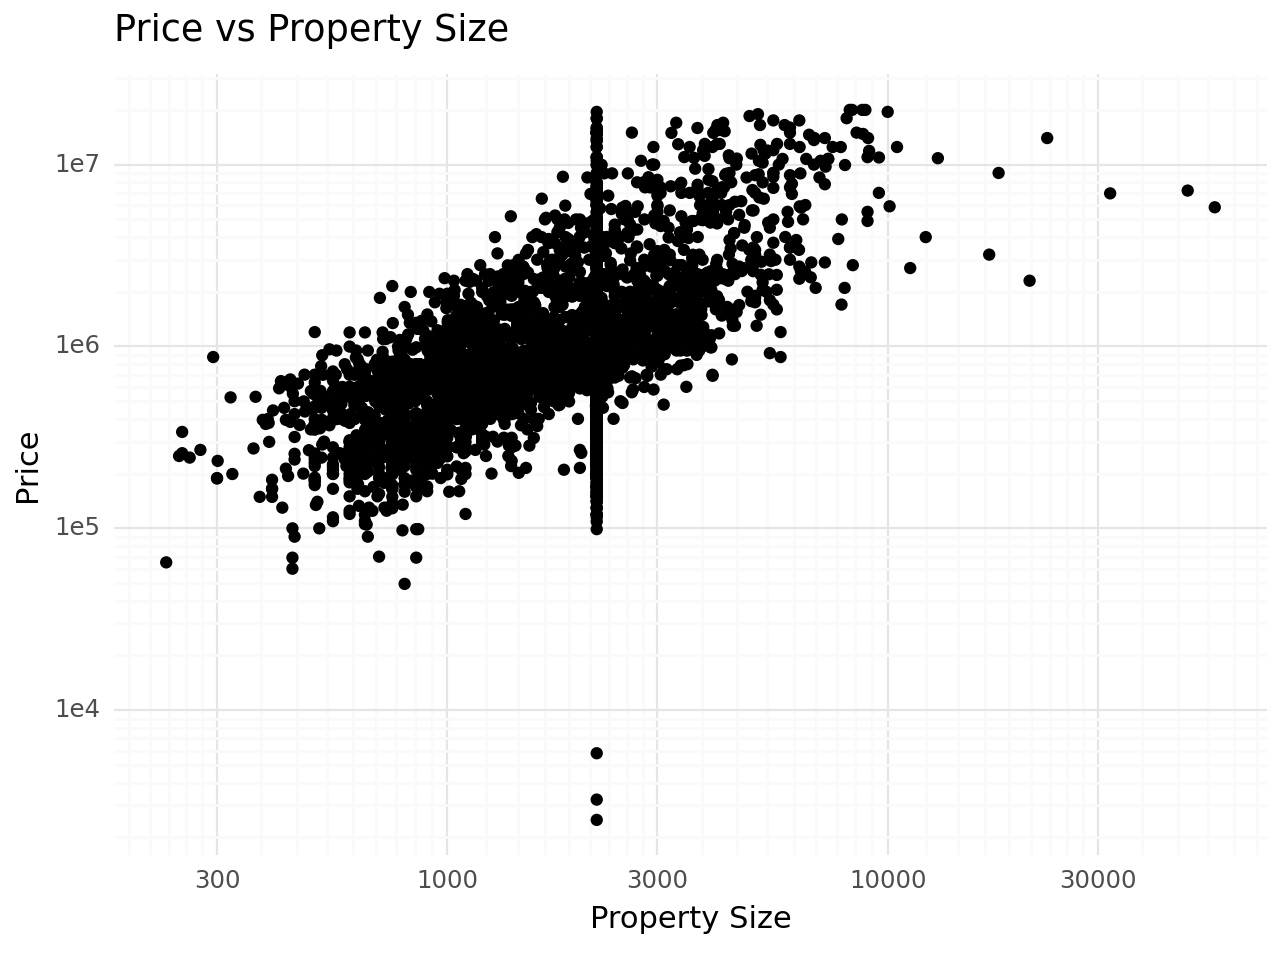

<Figure Size: (640 x 480)>

In [348]:
from plotnine import ggplot, aes, geom_point, labs, scale_x_log10, scale_y_log10, theme_minimal
#Property size analysis
#Exploring the relationship between the price and the size of the property
(ggplot(df) +
 aes(x='PROPERTYSQFT', y='PRICE') +
 geom_point() +
 labs(title='Price vs Property Size', x='Property Size', y='Price') +
 scale_x_log10() +
 scale_y_log10() +
 theme_minimal()
)

#explaining the analysis
#The scatter plot shows that there is a positive correlation between the price and the size of the property.
#The scatter plot also shows that there are some outliers in the data.
#The outliers are the houses with very high prices and very large sizes.
#The scatter plot also shows that there are some houses with very low prices and very small sizes.
#The scattter plot is not linear. This means that the relationship between the price and the size of the property is not linear.



#explaining the correlation
#The correlation between the price and the size of the property is 0.44.
#This shows that there is a positive correlation between the price and the size of the property.
#This means that as the size of the property increases, the price also increases.
#However, the correlation is not very strong.
#This means that the size of the property is not a very good predictor of the price.
# This means that the price of the property could be influenced by other factors as well.





In [349]:
#calculating the correlation between the price and the size of the property
correlation =df['PRICE'].corr(df['PROPERTYSQFT'])
correlation


0.4392901163162851

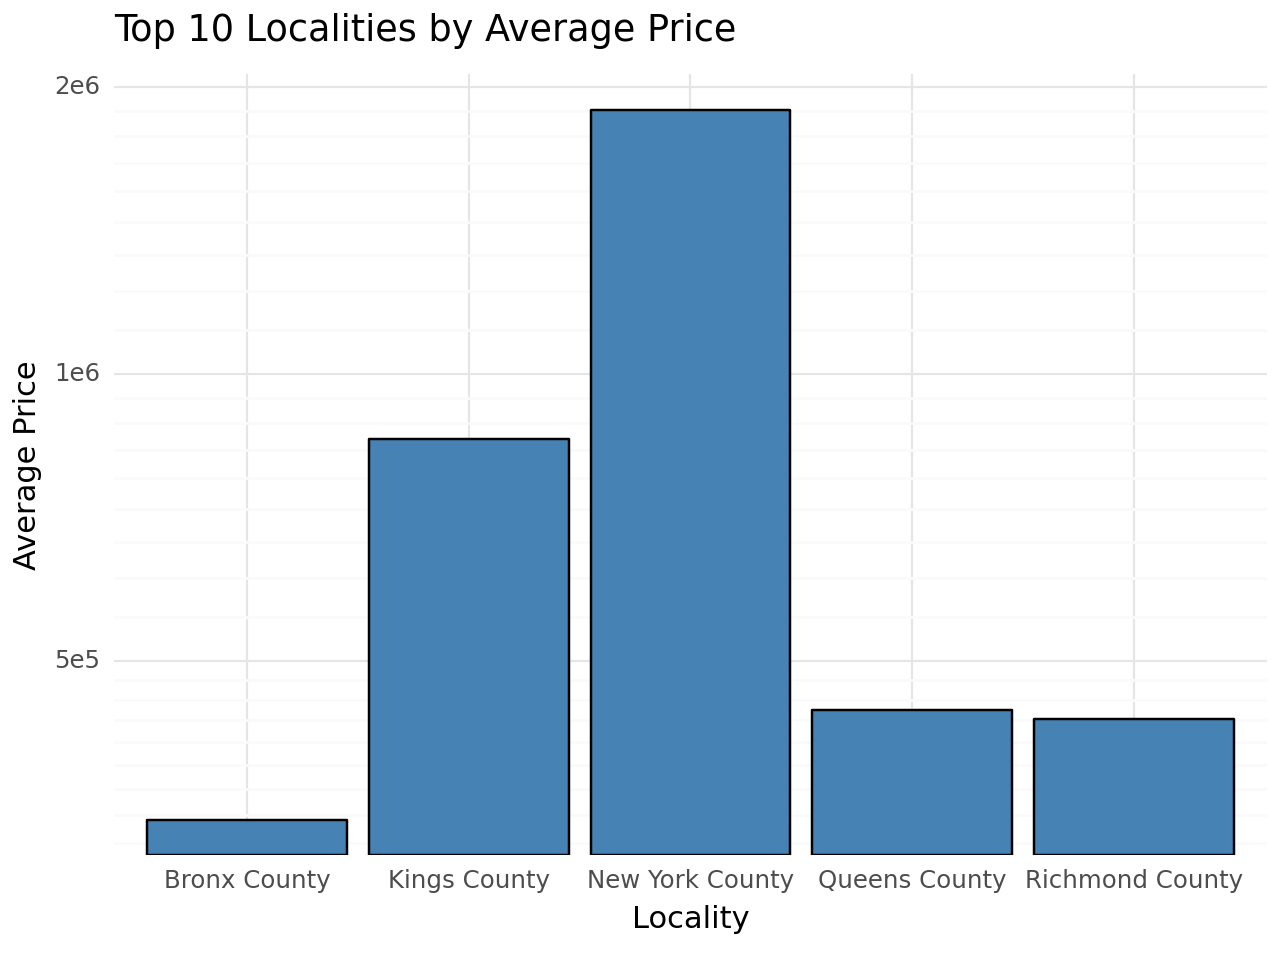

<Figure Size: (640 x 480)>

In [350]:
from plotnine import ggplot, aes, geom_bar, labs, scale_y_log10, theme_minimal
#Location based analysis
# Investigating geographical patterns in property prices
#Grouping properties by locatity and calculating average prices

df.groupby('LOCALITY')['PRICE'].mean().sort_values(ascending=False)

#plotting the top 10 localities by average price

top_localities = df.groupby('LOCALITY')['PRICE'].mean().sort_values(ascending=False).head(10).reset_index()

(ggplot(top_localities) +
 aes(x='LOCALITY', y='PRICE') +
 geom_bar(stat='identity', fill='steelblue', color='black') +
 labs(title='Top 10 Localities by Average Price', x='Locality', y='Average Price') +
 scale_y_log10() +
 theme_minimal()
)



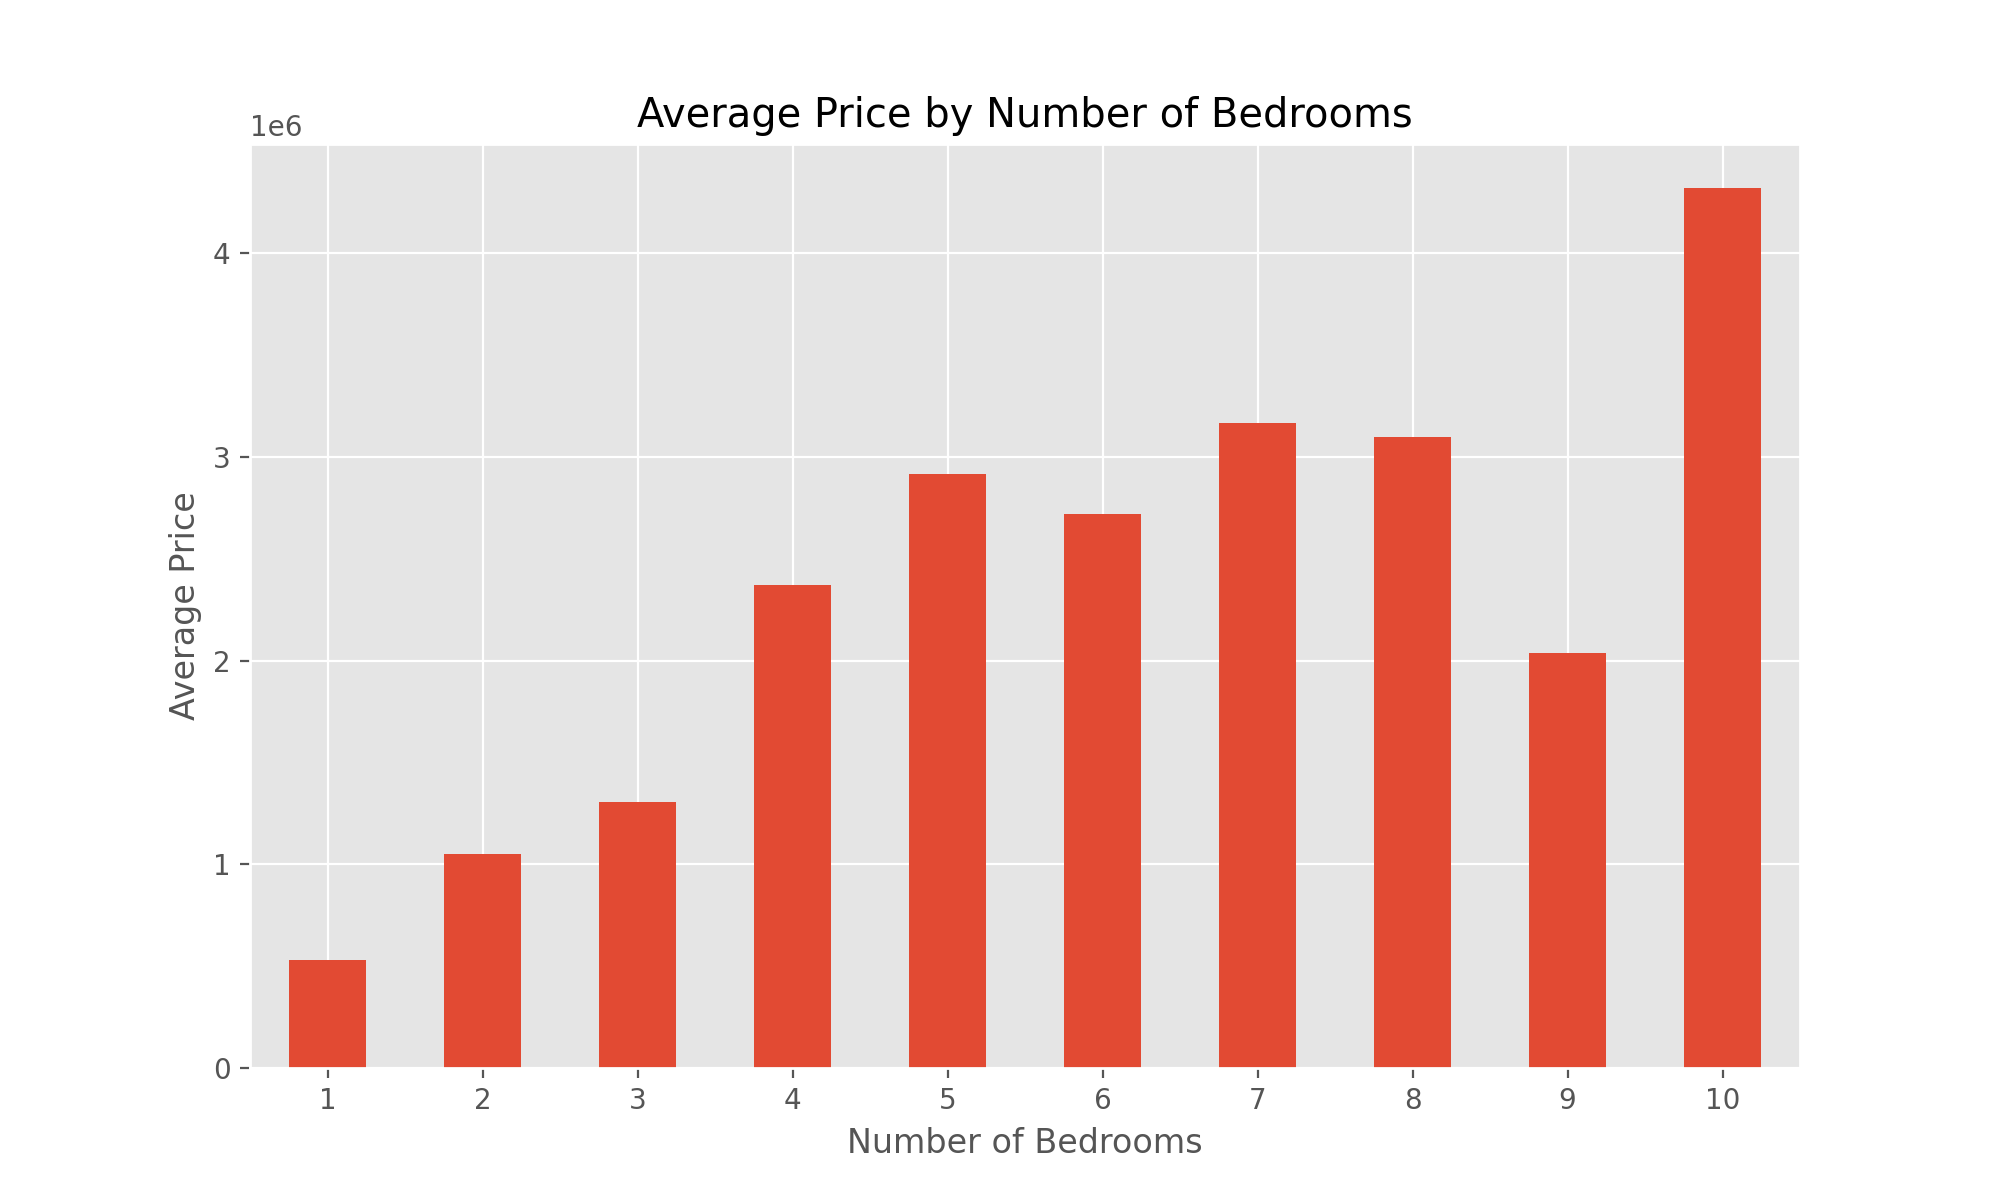

In [351]:
#plotting the average price by number of bedrooms

plt.figure(figsize=(10,6))
df.groupby('BEDS')['PRICE'].mean().plot(kind='bar')
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.xticks(rotation=0) 
plt.show()







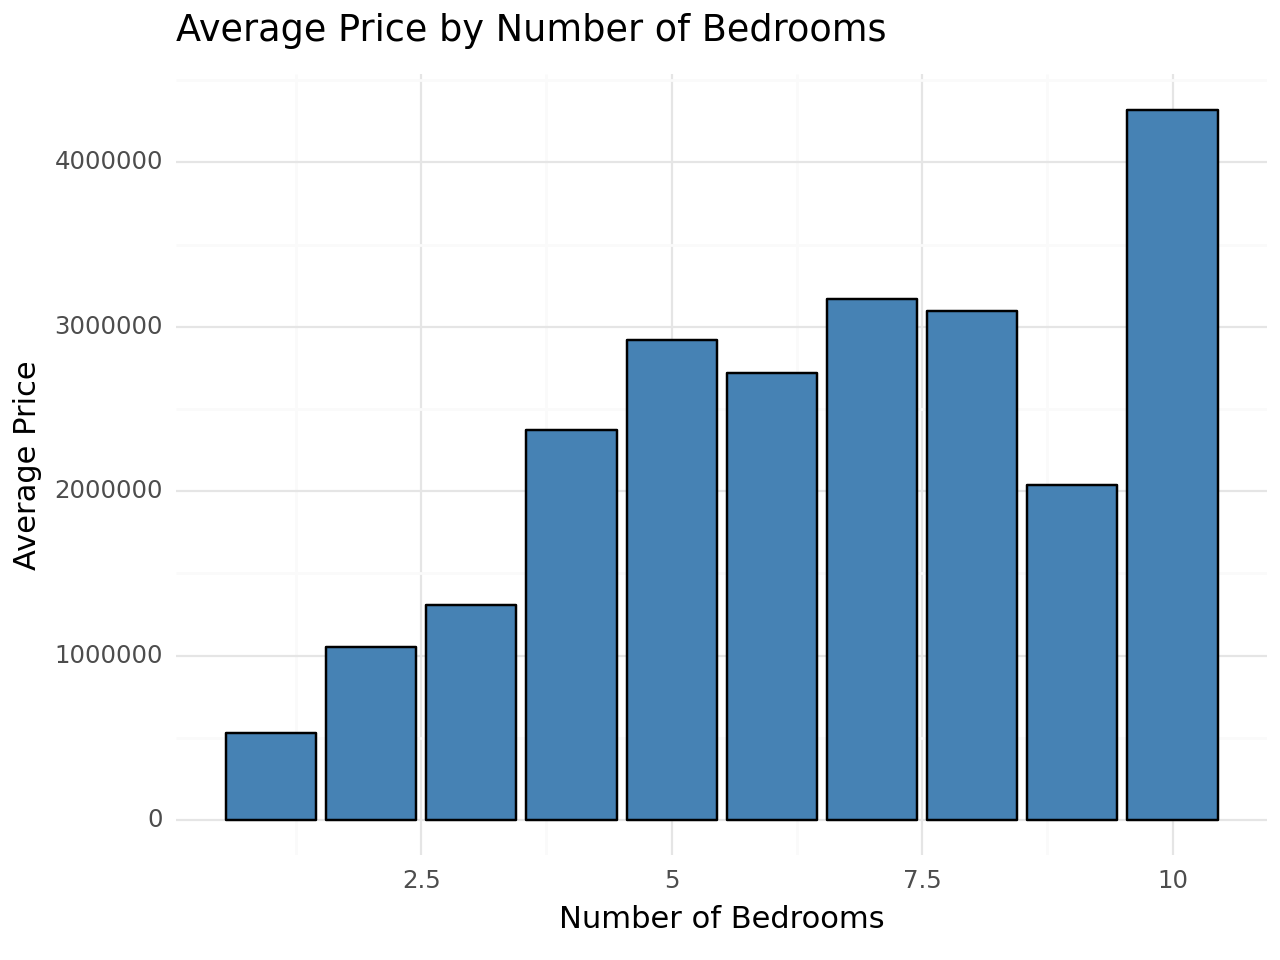

<Figure Size: (640 x 480)>

In [352]:
import numpy as np

(ggplot(df) +
 aes(x='BEDS', y='PRICE') +
 geom_bar(stat='summary', fun_y=np.mean, fill='steelblue', color='black') +
 labs(title='Average Price by Number of Bedrooms', x='Number of Bedrooms', y='Average Price') +
 theme_minimal()
)


Average House Prices by Number of Bedrooms:

The bar chart illustrates a general upward trend in average prices with an increase in the number of bedrooms. This indicates that properties with more bedrooms tend to be priced higher.
However, there is some fluctuation in this trend, particularly for properties with a very high number of bedrooms.

In [353]:
import plotly.express as px

fig = px.bar(df.groupby('BATH')['PRICE'].mean().reset_index(), x='BATH', y='PRICE', 
             title='Average Price by Number of Bathrooms', 
             labels={'BATH': 'Number of Bathrooms', 'PRICE': 'Average Price'})

fig.update_layout(xaxis={'tickangle': 45})

fig.show()


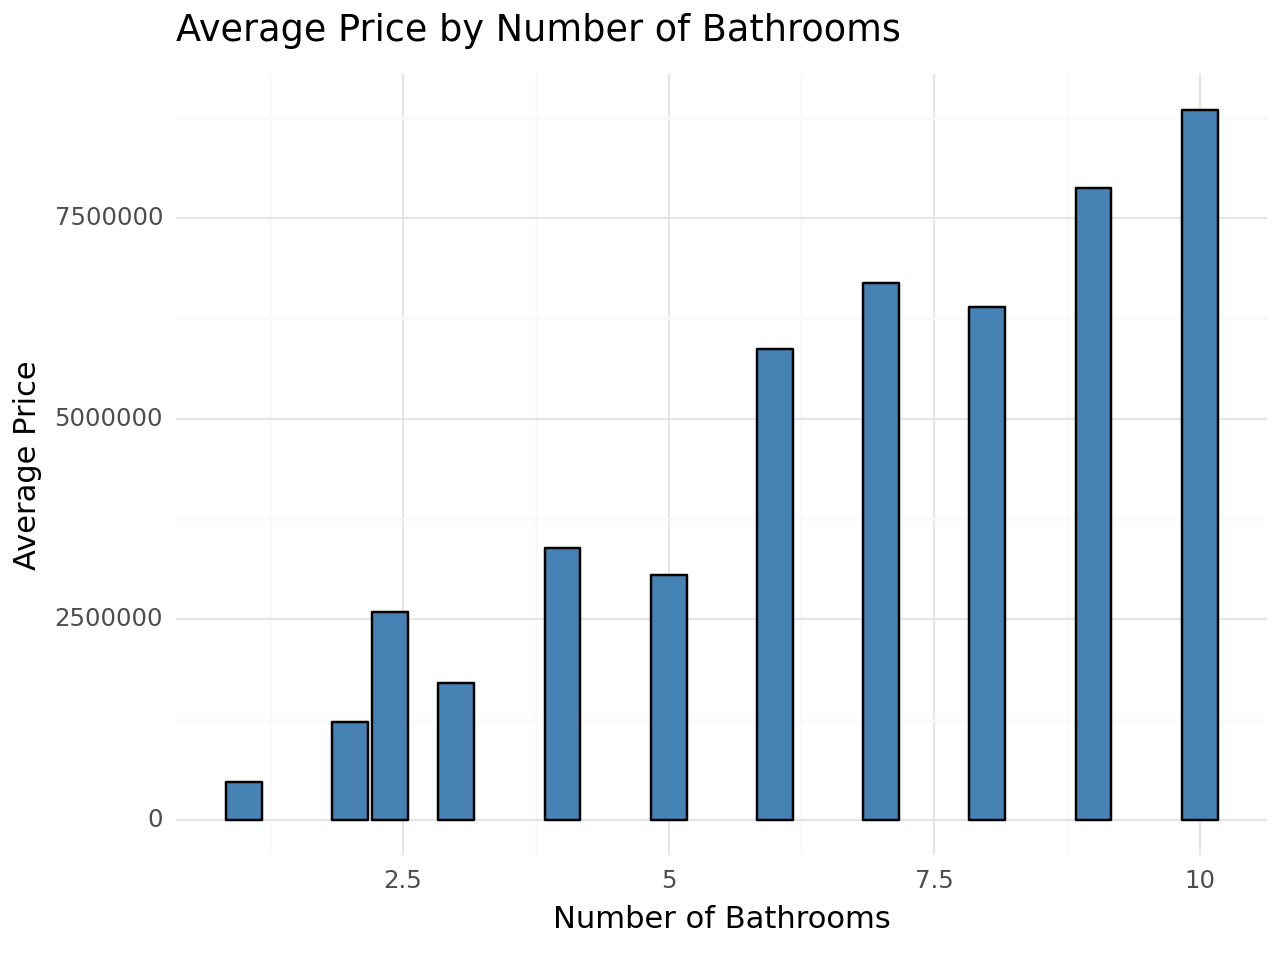

<Figure Size: (640 x 480)>

In [354]:
import numpy as np
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal
(ggplot(df) +
 aes(x='BATH', y='PRICE') +
 geom_bar(stat='summary', fun_y=np.mean, fill='steelblue', color='black') +
 labs(title='Average Price by Number of Bathrooms', x='Number of Bathrooms', y='Average Price') +
 theme_minimal()
)


Average House Prices by Number of Bathrooms:

Similarly, there's an increasing trend in average prices with the number of bathrooms. Properties with more bathrooms generally have higher average prices.
This trend also shows some inconsistencies, especially for properties with a very high number of bathrooms.

Insights from Bedroom and Bathroom Trends:

Impact on Prices: Both the number of bedrooms and bathrooms have a significant impact on property prices, with a general trend of higher prices for properties with more bedrooms and bathrooms.
Non-linear Trends: There are some non-linear trends observed, especially at the higher end of bedrooms and bathrooms, which might be due to the presence of luxury or unique properties.

In [355]:
#Broker performance analysis
#Identifying the top 10 brokers by number of properties sold
import plotly.express as px

top_brokers = df['BROKERTITLE'].value_counts().head(10)

fig = px.bar(top_brokers, x=top_brokers.index, y=top_brokers.values)
fig.update_layout(
    title="Top 10 Brokers by Number of Properties Sold",
    title_x=0.5,  # Move the title to the center
    yaxis_title="No of properties",
    xaxis_title="Broker",
    xaxis_tickangle=-45
)
fig.show()


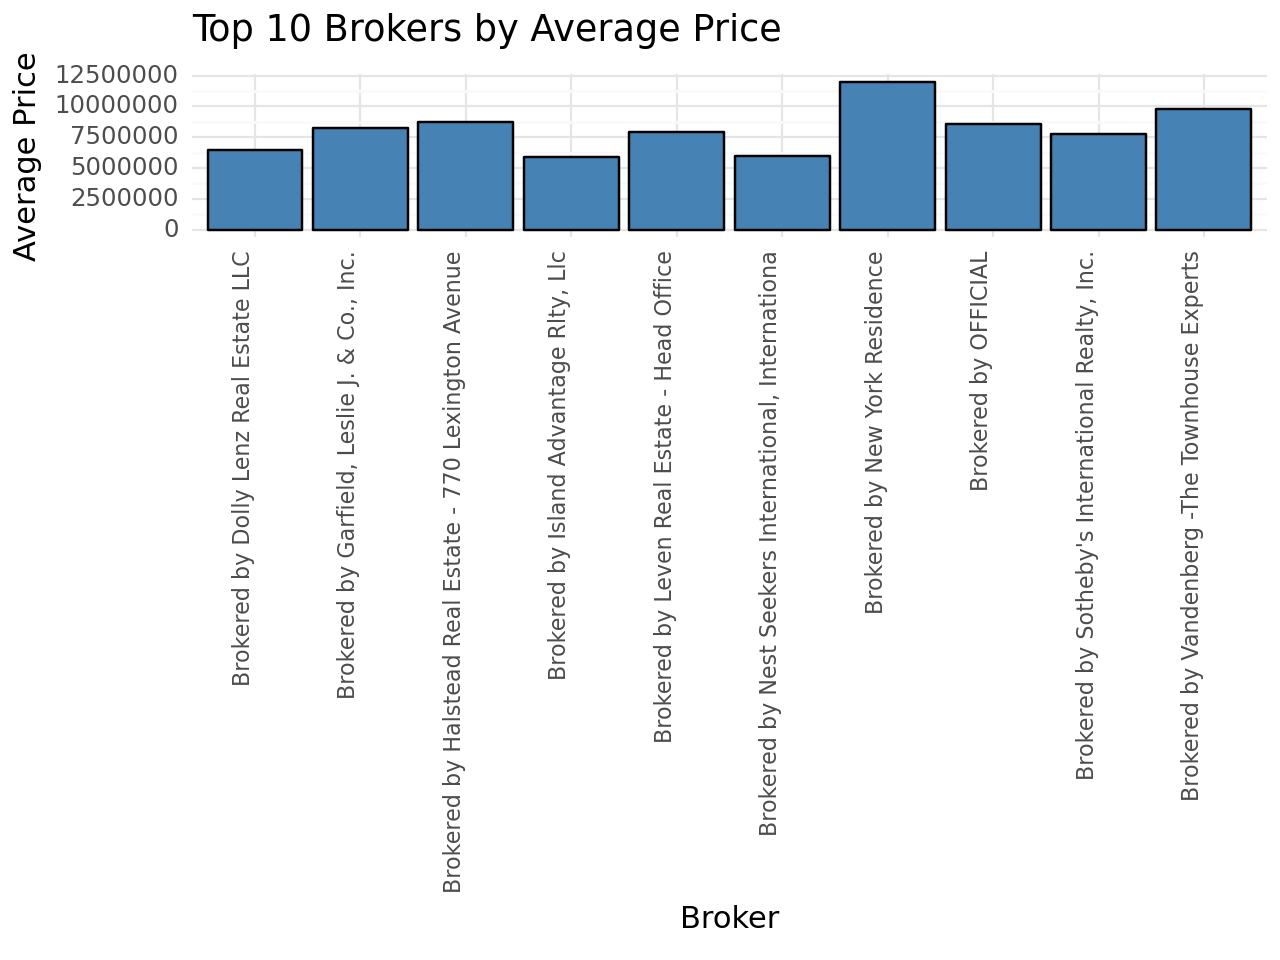

<Figure Size: (640 x 480)>

In [356]:
#Analyzing the performance of the top 10 brokers by average price

from plotnine import ggplot, aes, geom_bar, labs, theme_minimal
top_brokers = df.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False).head(10).reset_index()

(ggplot(top_brokers) +
 aes(x='BROKERTITLE', y='PRICE') +
 geom_bar(stat='identity', fill='steelblue', color='black') +
 labs(title='Top 10 Brokers by Average Price', x='Broker', y='Average Price') +
 theme_minimal() +
 theme(axis_text_x=element_text(angle=90, size=8, hjust=1))
)


##### Insights from Broker Performance Analysis:

Variation Among Brokers: There is a noticeable variation in average prices among different brokers, suggesting that broker choice might have an influence on the pricing of properties.
High-End Brokers: Some brokers appear to specialize in higher-priced properties, which could indicate a focus on luxury or premium real estate markets.

**Conclusion**

This analysis provides insights into various aspects of the New York housing market, including price trends, the impact of property size, location influences, and the role of bedrooms/bathrooms in pricing. Additionally, it highlights how different brokers position themselves in the market.

# Machine Learning Modelling

I will perform Linear Regression Analysis to Predict the Price of a house based on BEDS, BATHS, PROPERTYSQFT 

In [357]:
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [358]:
# inspect the data
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,New York County
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,New York County
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,New York County
5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,New York County
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,New York County


In [359]:
#drop BROKERTITLE, TYPE and LOCALITY columns
df = df.drop(['BROKERTITLE', 'TYPE', 'LOCALITY'], axis=1)
print(df.head())

    PRICE  BEDS  BATH  PROPERTYSQFT
0  315000     2   2.0   1400.000000
2  260000     4   2.0   2015.000000
3   69000     3   1.0    445.000000
5  690000     5   2.0   4004.000000
6  899500     2   2.0   2184.207862


In [360]:
#Apply log transformation to the price and property size columns
df['PRICE'] = np.log1p(df['PRICE'])
#df['PROPERTYSQFT'] = np.log1p(df['PROPERTYSQFT'])


In [361]:
#inspect the data
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT
0,12.660331,2,2.0,1400.000000
2,12.468441,4,2.0,2015.000000
3,11.141876,3,1.0,445.000000
5,13.444448,5,2.0,4004.000000
6,13.709595,2,2.0,2184.207862


In [362]:
# Define features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']


In [363]:
#inspect the features
X.head()

,BEDS,BATH,PROPERTYSQFT
0,2,2.0,1400.000000
2,4,2.0,2015.000000
3,3,1.0,445.000000
5,5,2.0,4004.000000
6,2,2.0,2184.207862


In [364]:
#inspect the target variable
y.head()

0    12.660331
2    12.468441
3    11.141876
5    13.444448
6    13.709595
Name: PRICE, dtype: float64

In [365]:
#split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [366]:
#intialize the linear regression model
LinReg = LinearRegression()

In [367]:
#fit the model to the training data
LinReg.fit(X_train, y_train)


LinearRegression()

In [368]:
#make predictions using the model

y_pred = LinReg.predict(X_test)


In [369]:
#evaluate the model
#calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#calculate the r-squared value
r2 = r2_score(y_test, y_pred)

print(rmse)
print(r2)


0.7142028872726106
0.445803066126791


In [370]:
#intercept and coefficients
print(LinReg.intercept_)
print(LinReg.coef_)

12.577228053204184
[-4.75260970e-03  4.00213590e-01  1.21266662e-04]


In [371]:
#pair feature names with coefficients
list(zip(X.columns, LinReg.coef_))


[('BEDS', -0.004752609700155022),
 ('BATH', 0.4002135897657434),
 ('PROPERTYSQFT', 0.00012126666182912875)]

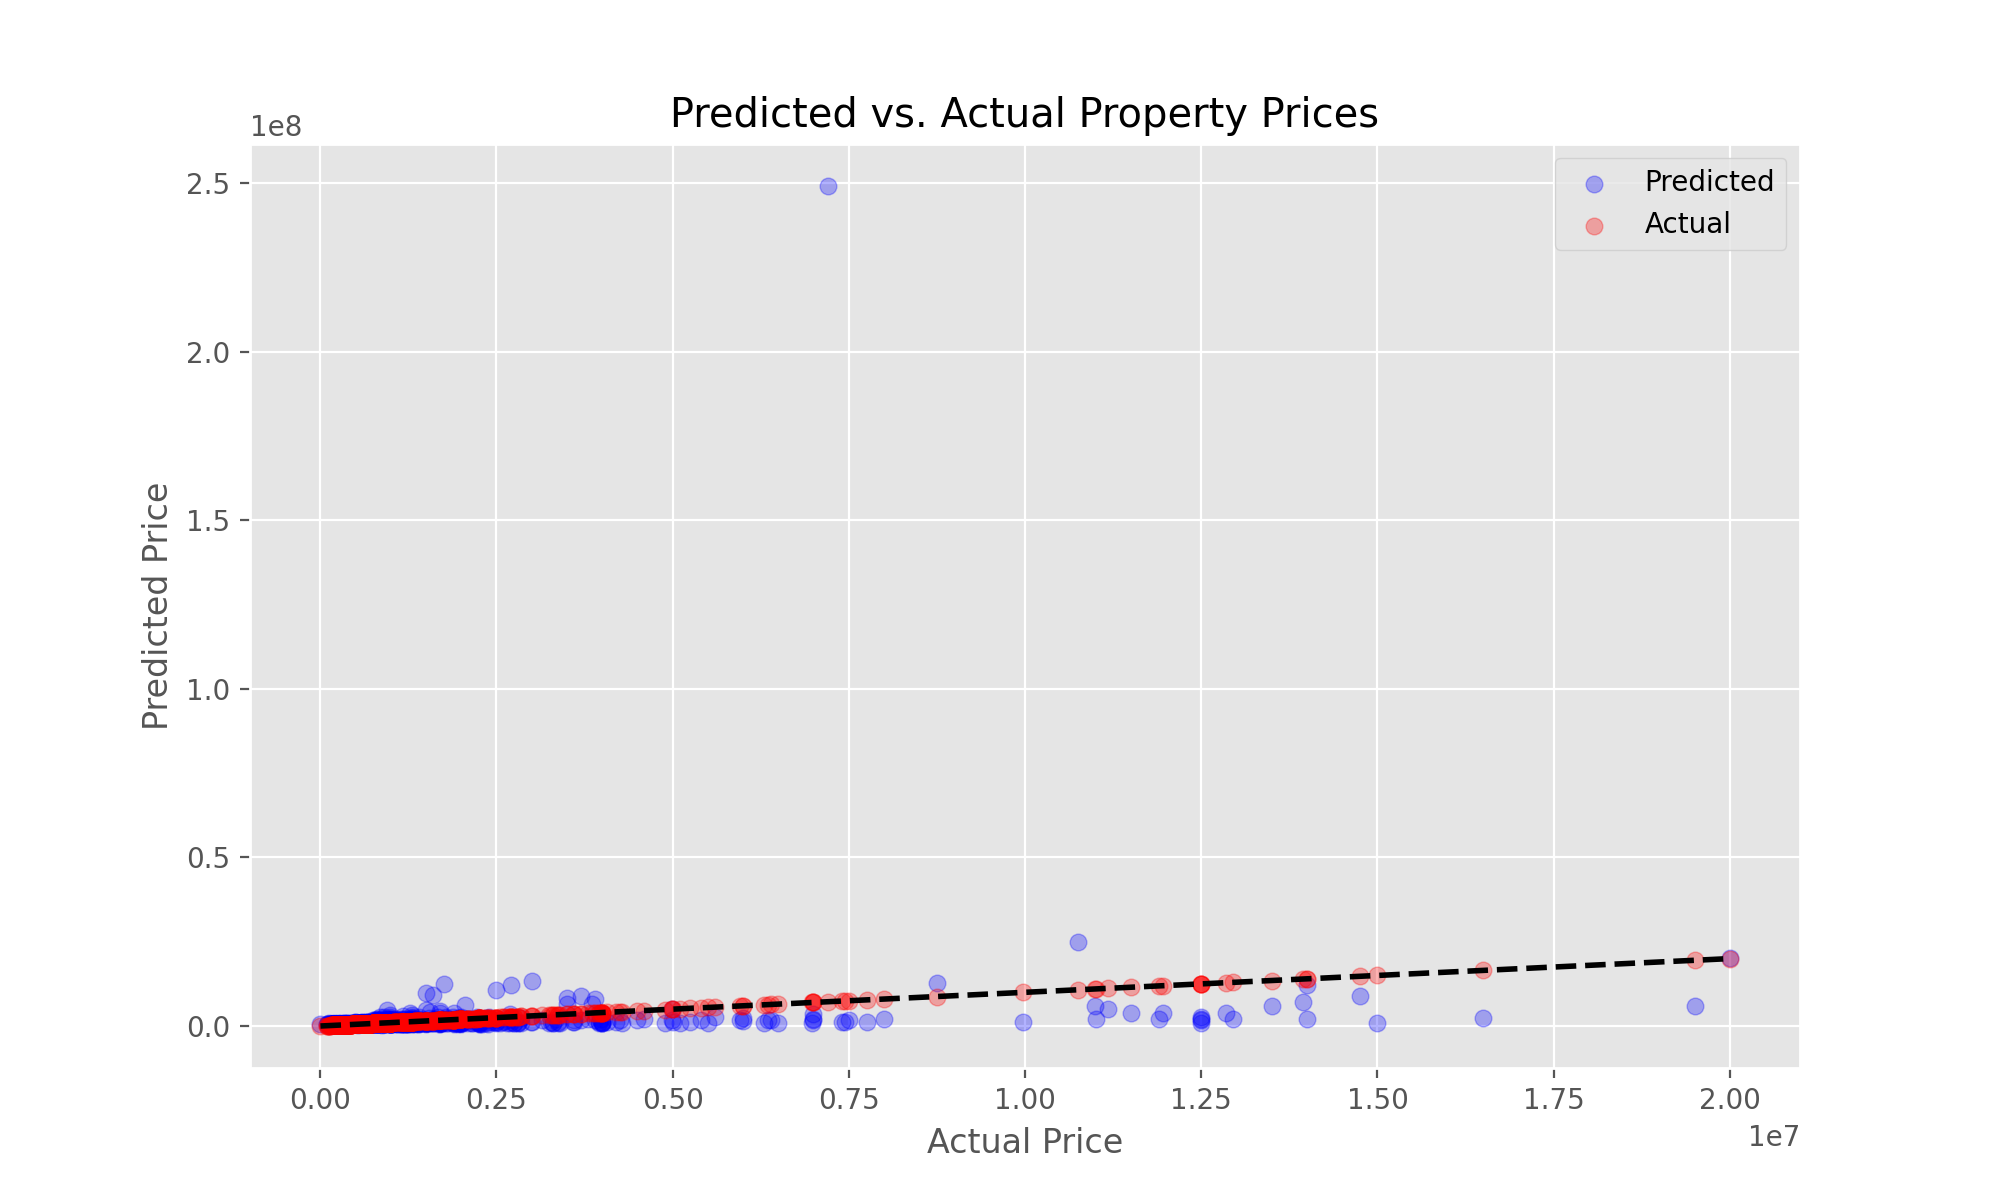

In [374]:
#plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred), c='blue', alpha=0.3, label='Predicted')
plt.scatter(np.expm1(y_test), np.expm1(y_test), c='red', alpha=0.3, label='Actual')
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()], [np.expm1(y_test).min(), np.expm1(y_test).max()], 'k--', lw=2) # Line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Property Prices')
plt.legend()
plt.show()

